## Imports, data load, metric function definition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import BallTree
import time
import torch

In [2]:
import datetime as dt

# define some constants
epoch = dt.datetime(1970, 1, 1)
gregorian_8601_to_unix_epoch = 62167305600

def date(gregorian_8601_seconds):

    # get number of seconds from epoch
    from_epoch = gregorian_8601_seconds - gregorian_8601_to_unix_epoch

    # convert to python datetime
    return epoch + dt.timedelta(seconds=from_epoch)

In [3]:
#wind and atmospheric pressure are responsible for the surge
#-1 hPa--> +1cm


In [4]:
#the test set is made of entries each having 5 days, separated one from the other by large times, the times to predict are 
#the next foloowing 5 days. So in total we have a 10 day cycle to know 

X_train = np.load('X_train_surge.npz')
Y_train = pd.read_csv('Y_train_surge.csv')
X_test = np.load('X_test_surge.npz')

In [5]:
def surge_prediction_metric(dataframe_y_true, dataframe_y_pred):
    weights = np.linspace(1, 0.1, 10)[np.newaxis]
    surge1_columns = [
        'surge1_t0', 'surge1_t1', 'surge1_t2', 'surge1_t3', 'surge1_t4',
        'surge1_t5', 'surge1_t6', 'surge1_t7', 'surge1_t8', 'surge1_t9' ]
    surge2_columns = [
        'surge2_t0', 'surge2_t1', 'surge2_t2', 'surge2_t3', 'surge2_t4',
        'surge2_t5', 'surge2_t6', 'surge2_t7', 'surge2_t8', 'surge2_t9' ]
    surge1_score = (weights * (dataframe_y_true[surge1_columns].values - dataframe_y_pred[surge1_columns].values)**2).mean()
    surge2_score = (weights * (dataframe_y_true[surge2_columns].values - dataframe_y_pred[surge2_columns].values)**2).mean()

    return surge1_score + surge2_score

In [6]:
slp_train = X_train['slp']
t_slp_train = X_train['t_slp']

t_surge1_input_train = X_train['t_surge1_input']
t_surge2_input_train = X_train['t_surge2_input']

surge1_input_train = X_train['surge1_input']
surge2_input_train = X_train['surge2_input']

t_surge1_output_train = X_train['t_surge1_output']
t_surge2_output_train = X_train['t_surge2_output']

In [7]:
slp_test = X_test['slp']
t_slp_test = X_test['t_slp']

t_surge1_input_test = X_test['t_surge1_input']
t_surge2_input_test = X_test['t_surge2_input']

surge1_input_test = X_test['surge1_input']
surge2_input_test = X_test['surge2_input']

t_surge1_output_test = X_test['t_surge1_output']
t_surge2_output_test = X_test['t_surge2_output']

In [33]:
def time_elapsed_day(time_1, time_2):
    return (time_1-time_2)/(3600*24)

In [34]:
# format for train data

In [35]:
def format_t(data):
    new_set = set()
    for j in data:
        for i in j:
            new_set.add(i)
    new_set=sorted(list(new_set))
    return new_set
    
    
def format_(data, t_data, t_set):
    new_set = np.zeros(len(t_set))
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            a = data[i][j]
            b = t_data[i][j]
            c = t_set.index(b)
            new_set[c] = a
    return new_set


In [36]:
t_slp_train_set = format_t(t_slp_train)
t_surge1_input_train_set = format_t(t_surge1_input_train)
t_surge2_input_train_set = format_t(t_surge2_input_train)
surge1_input_train_set = format_(surge1_input_train, t_surge1_input_train, t_surge1_input_train_set)
surge2_input_train_set = format_(surge2_input_train, t_surge2_input_train, t_surge2_input_train_set)

In [37]:
t_slp_test_set = format_t(t_slp_test)
t_surge1_input_test_set = format_t(t_surge1_input_test)
t_surge2_input_test_set = format_t(t_surge2_input_test)
surge1_input_test_set = format_(surge1_input_test, t_surge1_input_test, t_surge1_input_test_set)
surge2_input_test_set = format_(surge2_input_test, t_surge2_input_test, t_surge2_input_test_set)

# Tests

In [47]:
t_diff_cities = (np.array(t_surge2_input_train_set)-np.array(t_surge1_input_train_set))/3600

In [51]:
max(t_diff_cities)

5.0133333

In [56]:
t_surge1_input_train_set[13140]

1080673200.0

In [66]:
surge2_input_train_set[1000]

-1.0932904481887817

In [55]:
time.gmtime(1080691200.0)

time.struct_time(tm_year=2004, tm_mon=3, tm_mday=31, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=91, tm_isdst=0)

In [57]:
time.gmtime(1080673200.0)

time.struct_time(tm_year=2004, tm_mon=3, tm_mday=30, tm_hour=19, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=90, tm_isdst=0)

In [53]:
np.where(t_diff_cities==5.0133333)

(array([13140], dtype=int64),)

In [27]:
surge_diff_cities = (surge1_input_train_set - surge2_input_train_set)

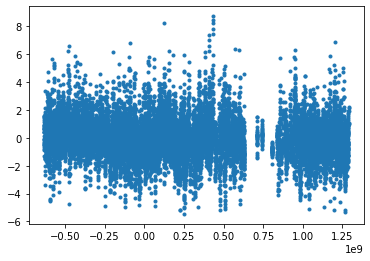

In [28]:
plt.scatter(t_surge2_input_train_set, surge_diff_cities, marker='.' )

In [16]:
np.mean(t_diff_cities)

1.9762228

In [17]:
min(surge1_input_train_set)

-2.9692142009735107

In [18]:
time.gmtime(int(t_surge1_input_train_set[-1006]))

time.struct_time(tm_year=2008, tm_mon=2, tm_mday=8, tm_hour=15, tm_min=0, tm_sec=16, tm_wday=4, tm_yday=39, tm_isdst=0)

In [120]:
list(surge1_input_train_set).index(7.608740329742432)

14250

In [125]:
surge2_input_train_set[14250]

0.742432177066803

In [127]:
t_surge1_input_train_set[14250]

1201856400.0

In [129]:
t_surge1_input_train[0]

array([-6.311088e+08, -6.310656e+08, -6.310188e+08, -6.309756e+08,
       -6.309288e+08, -6.308856e+08, -6.308424e+08, -6.307992e+08,
       -6.307524e+08, -6.307092e+08], dtype=float32)

In [130]:
t_surge2_input_train[0]

array([-6.311016e+08, -6.310584e+08, -6.310152e+08, -6.309684e+08,
       -6.309252e+08, -6.308820e+08, -6.308352e+08, -6.307920e+08,
       -6.307488e+08, -6.307020e+08], dtype=float32)

In [146]:
time.gmtime(int(t_surge1_input_train[4000][0]))

time.struct_time(tm_year=1988, tm_mon=1, tm_mday=9, tm_hour=16, tm_min=59, tm_sec=44, tm_wday=5, tm_yday=9, tm_isdst=0)

In [118]:
for i in surge1_input_train_set:
    if i>7:
        print(i)

7.608740329742432


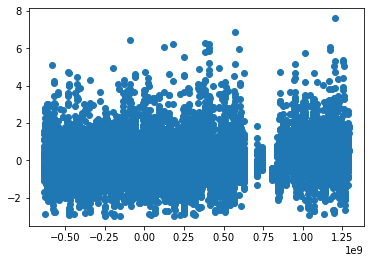

In [115]:
plt.scatter(t_surge1_input_train_set,surge1_input_train_set)

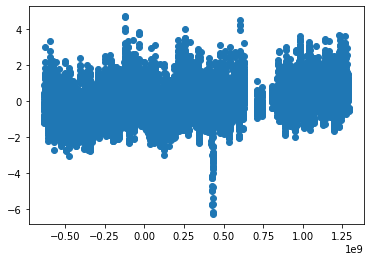

In [116]:
plt.scatter(t_surge2_input_train_set,surge2_input_train_set)

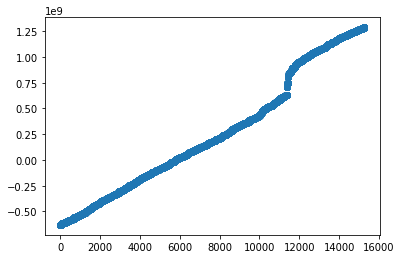

In [103]:
plt.scatter(range(len(t_surge2_input_train_set)), t_surge2_input_train_set)

In [ ]:
t_slp_test_set = set()
for j in t_slp_test:
    for i in j:
        t_slp_test_set.add(i)
t_slp_test_set=sorted(list(t_slp_test_set))

In [88]:
len(set.intersection(set(t_slp_test_set), set(t_slp_train_set)))

1121

In [90]:
len(t_slp_test_set)

20360

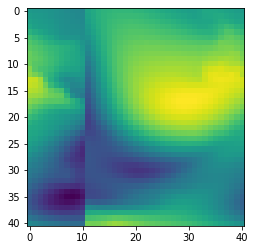

In [61]:
plt.imshow(slp_train[0][10])

## Benchmark
Train using kNN of pressure fields at two instants in time, with 40 neighbours

In [62]:
nfields = 2; time_step_slp = 8
slp_train = []
slp_all = X_train['slp']
for i in range(5559):
    slp_train.append(np.ndarray.flatten(slp_all[i,-1]))
    for j in range(1,nfields):
        slp_train[-1] = np.concatenate( ( slp_train[-1], np.ndarray.flatten(slp_all[i,-1-j*time_step_slp]) ) )
slp_train = np.array(slp_train)

In [63]:
slp_test = []
slp_all_test = X_test['slp']
for i in range(509):
    slp_test.append(np.ndarray.flatten(slp_all_test[i,-1]))
    for j in range(1,nfields):
        slp_test[-1] = np.concatenate( ( slp_test[-1], np.ndarray.flatten(slp_all_test[i,-1-j*time_step_slp]) ) )
slp_test = np.array(slp_test)

In [8]:
tree = BallTree(slp_train)

In [9]:
surge_test_benchmark = []; k = 40
for i in range(509):
    dist, ind = tree.query([slp_test[i]], k=k)
    surge_test_benchmark.append(np.mean(surge_train[ind[0]], axis=0))
surge_test_benchmark = np.array(surge_test_benchmark)

In [10]:
y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
y_test_benchmark = pd.DataFrame(data=surge_test_benchmark, columns=y_columns, index=X_test['id_sequence'])
y_test_benchmark.to_csv('Y_test_benchmark.csv', index_label='id_sequence', sep=',')